<h2>Normal Distribution</h2>

    Normal Distribution is an important concept in statistics and the backbone of Machine Learning. It becomes essential 
    for Data Scientists to know about Normal Distribution when they work with Linear Models(perform well if the data is 
    normally distributed), Central Limit Theorem, and during exploratory data analysis. 
    
    Discovered by Carl Friedrich Gauss, Normal Distribution/Gaussian Distribution is a continuous probability distribution
    and has a bell-shaped curve that is symmetrical from the mean point to both halves of the curve.

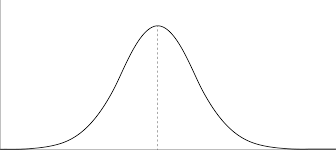

<h3>Mathematical Definition:</h3>

    A continuous random variable "x" is said to follow a normal distribution with parameter μ(mean) and σ(standard 
    deviation), if it's probability density function is given by,
    
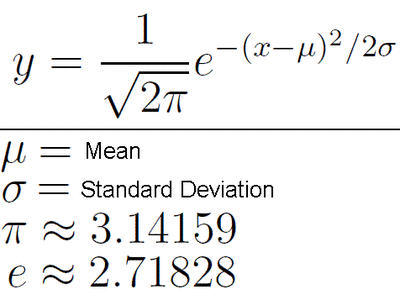
 
     where z = standard normal variate

<h3>Standard Normal Distribution:</h3>

    The simplest case of the normal distribution, known as the Standard Normal Distribution, has an expected value of 
    μ(mean) 0 and σ(s.d.) 1, and is described by this probability density function,
   
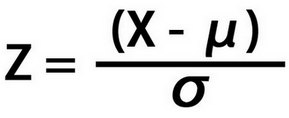


                                    where z = standard normal variate

<h3>Standard Normal Distribution:</h3>

    The simplest case of the normal distribution, known as the Standard Normal Distribution, has an expected value of 
    μ(mean) 0 and σ(s.d.) 1, and is described by this probability density function,
    
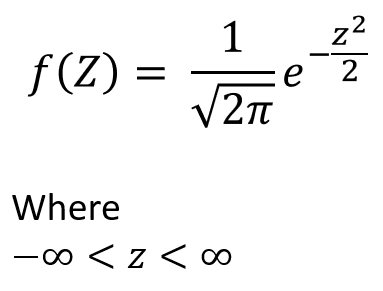
    

<h3>Distribution Curve Characteristics:</h3>

    1. The total area under the normal curve is equal to 1. 
    2. It is a continuous distribution.
    3. It is symmetrical about the mean. Each half of the distribution is a mirror image of the other half.
    4. It is asymptotic to the horizontal axis.
    5. It is unimodal.
    
<h3>Area Properties:</h3>

    The normal distribution carries with it assumptions and can be completely specified by two parameters: the mean and
    the standard deviation. If the mean and standard deviation are known, then one essentially knows as much as if he or 
    she had access to every point in the data set.
    
    The empirical rule is a handy quick estimate of the spread of the data given the mean and standard deviation of a data
    set that follows a normal distribution. It states that:
    
    1. 68% of the data will fall within 1 standard deviation of the mean.
    2. 95% of the data will fall within 2 standard deviations of the mean.
    3. Almost all (99.7% ) of the data will fall within 3 standard deviations of the mean.
    
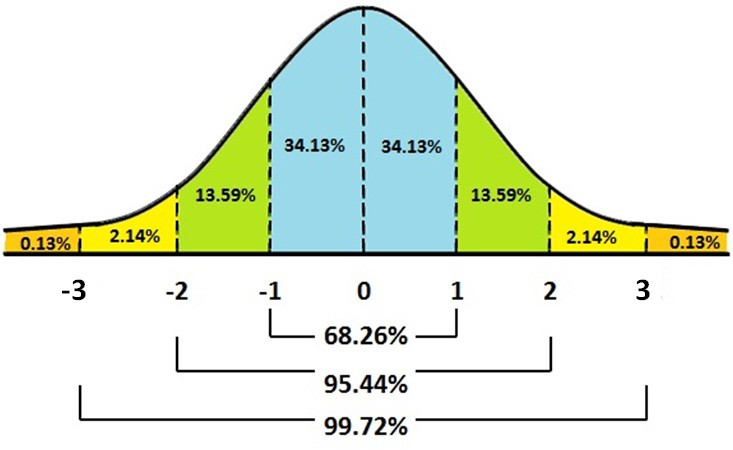

    Thus, almost all the data lies within 3 standard deviations. This rule enables us to check for Outliers and is very 
    helpful when determining the normality of any distribution.
    
    
<h3>Machine Learning Aspect</h3>

    In ML data satisfying Normal Distribution, is very helpful for model building. It makes math easier. Models like LDA,
    Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc. are explicitly calculated from the assumption of 
    the distribution being a bivariate or multivariate normal.
    
    Many natural phenomena in the world follow a log-normal distribution. Such as financial data and forecasting data. By 
    applying transformation techniques we can convert the data into a normal distribution. Sigmoid functions work most 
    naturally with normally distributed data.
    
    So it's better to explore the data critically and check for the underlying distributions for each variable before going
    to fit the model.
    
    Note: Normality is an assumption for the ML models. It is not mandatory that data should always follow normality. 
    ML models work very well in the case of non-normally distributed data also. Models like decision tree, XgBoost, 
    don't assume any normality and work on raw data as well. Also, linear regression is statistically effective if only
    the model errors are Gaussian, not exactly the entire dataset.
    
        
        

<b><i>Here I have done an analysis of the Boston Housing Price Dataset. I have explained not only the visualization techniques but also the conversion techniques along with plots that can validate the normality of the distribution.</i></b>

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
import statsmodels.api as sm 

<h4>Boston Housing Price</h4>

    Let's analyse the correlation on the Boston Housing Price Dataset. Here we have 14 numerical feautres. Details are given
    below.
    
     1. crim -    per capita crime rate by town
     2. zn -      proportion of residential land zoned for lots over 25,000 sq.ft.
     3. indus -   proportion of non-retail business acres per town.
     4. chas -    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
     5. nox -     nitrogen oxides concentration (parts per 10 million).
     6. rm -      average number of rooms per dwelling.
     7. age -     proportion of owner-occupied units built prior to 1940.
     8. dis -     weighted mean of distances to five Boston employment centres.
     9. rad -     index of accessibility to radial highways.
    10. tax -     full-value property-tax rate per 10,000 dollar.
    11. ptratio - pupil-teacher ratio by town.
    12. black -   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    13. lstat -   lower status of the population (percent).
    14. medv -    median value of owner-occupied homes in $1000s.

In [2]:
df = pd.read_csv("boston-dataset/boston_data.csv")
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6


In [3]:
#getting all columns in a list
col_list = list(df.columns)
col_list.remove("chas") #as it is a categorical data

<h3>Visualization Techniques</h3>

<h4>1. Histograms</h4>
    
    A Histogram is a kind of bar graph which is an estimate of the probability distribution of a continuous variable.
    It defines numerical data and divided into uniform Bins which are a consecutive, non-overlapping intervals of a 
    variable.

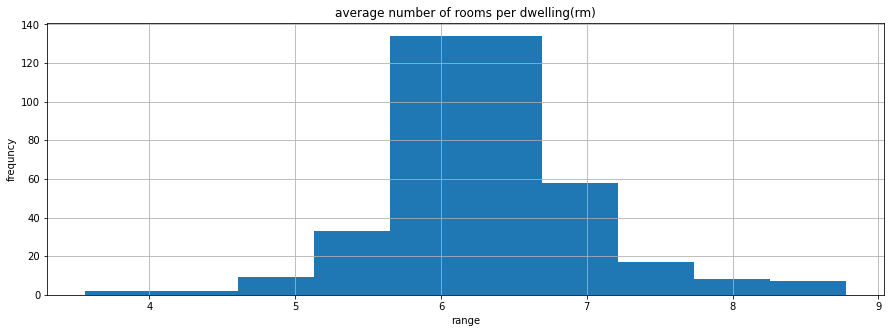

In [4]:
#defining fig size
fig= pt.figure(figsize=(15,5))
#plotting histogram of rm feature - average number of rooms per dwelling.
pt.hist(df["rm"])
pt.xlabel("range")
pt.ylabel("frequncy")
pt.title("average number of rooms per dwelling(rm)")
pt.grid()
pt.show()

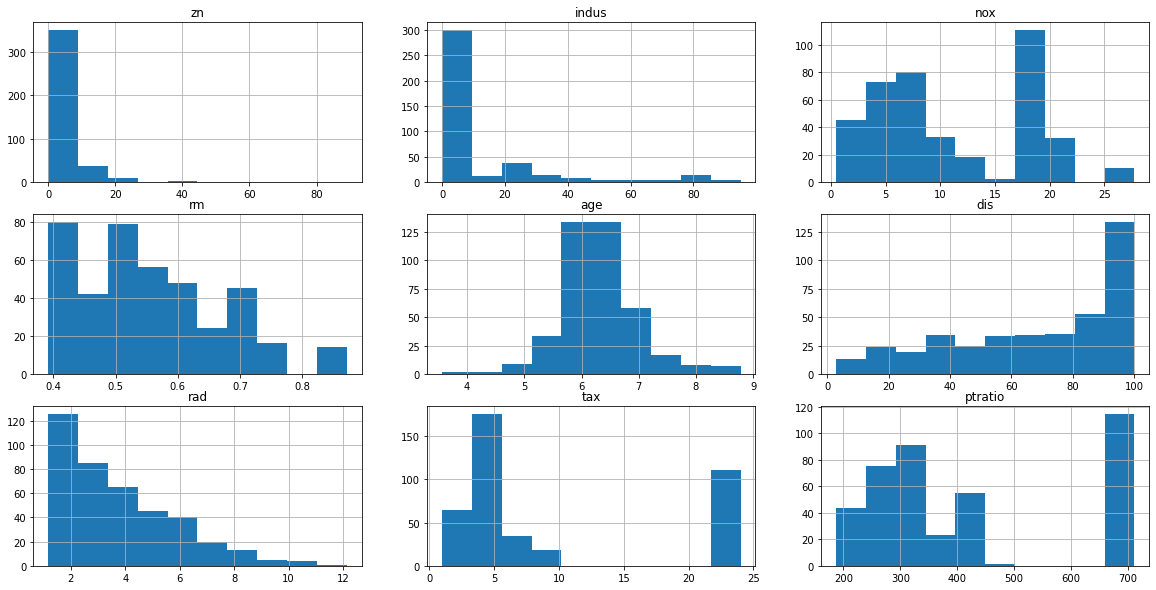

In [5]:
#subplots
fig, axs = pt.subplots(nrows=3, ncols=3)
fig.set_size_inches(20, 10)
cnt = 0
for i in range(0,3):
    for j in range(0,3):
        ax = axs[i][j]
        ax.hist(df[col_list[cnt]]); cnt += 1
        ax.set_title(col_list[cnt])
        ax.grid()

<h4>2. kdeplot</h4>
    
    Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or 
    non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether.

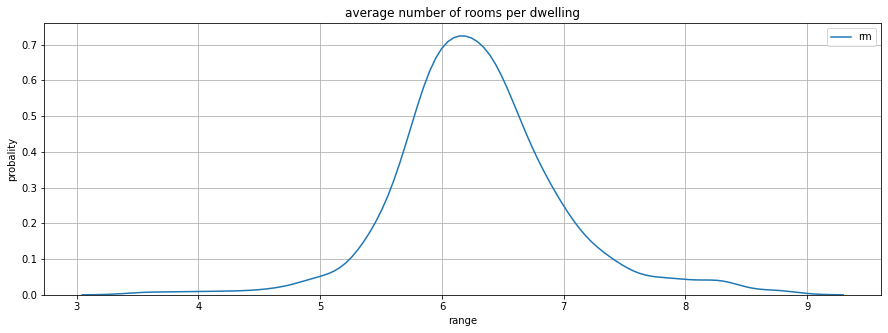

In [6]:
fig= pt.figure(figsize=(15,5))
sns.kdeplot(data=df["rm"])
pt.xlabel("range")
pt.ylabel("probality")
pt.title("average number of rooms per dwelling")
pt.grid()
pt.show()

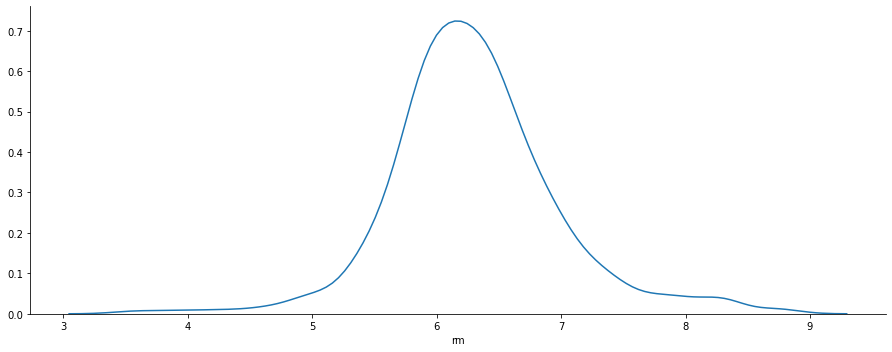

In [7]:
#using searborn facetgrid
sns.FacetGrid(df, height=5, aspect=2.5).map(sns.kdeplot, "rm")

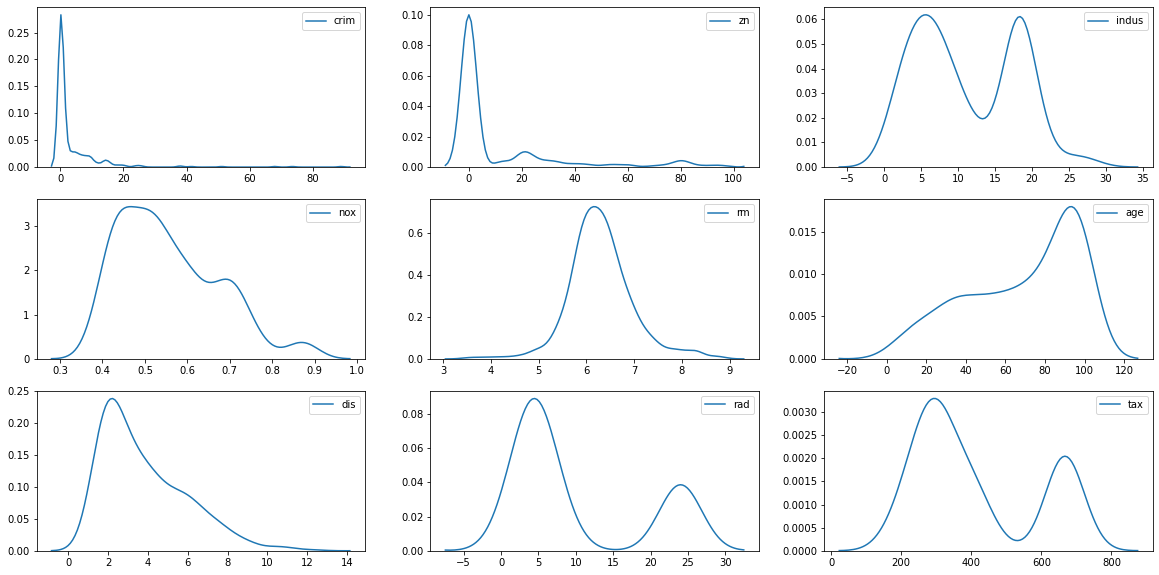

In [8]:
fig, axs = pt.subplots(nrows=3, ncols=3)
fig.set_size_inches(20, 10)
cnt = 0
for i in range(0,3):
    for j in range(0,3):
        sns.kdeplot(data=df[col_list[cnt]], ax=axs[i,j]); cnt += 1
        ax.set_title(col_list[cnt])
        ax.grid()

<h3>Feature Analysis</h3>

    Let's take an example of feature rm(average number of rooms per dwelling) which closely resembles a normal distribution.

In [9]:
def kde_plot(input_feature):
    #getting log values 
    df['log_times']=[math.log(i) for i in df[input_feature].values]
    #getting kde plot
    fig = sns.FacetGrid(df, size=5.5, aspect=2.2).map(sns.kdeplot, "log_times")
    fig.set_axis_labels('log_values', 'probabilities')
    pt.show()

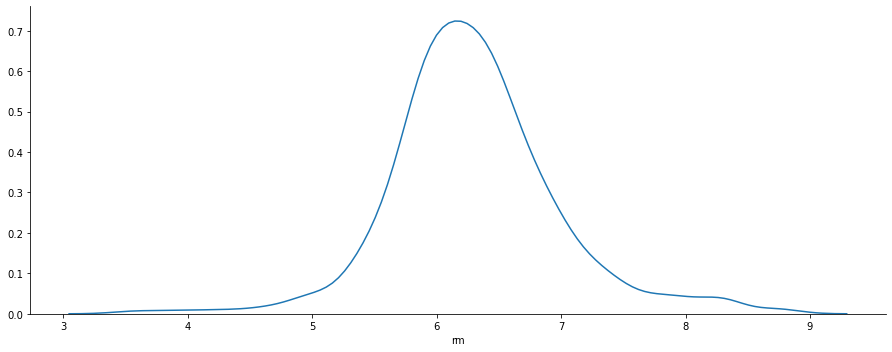

In [10]:
#using searborn facetgrid
sns.FacetGrid(df, height=5, aspect=2.5).map(sns.kdeplot, "rm")

    Though it has some distortion in the right tail, We need to check how close it resembles a normal distribution. 
    For that, we need to check the Q-Q Plot.
    
<h4>QQ Plot</h4>

    When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile - 
    quantile plot or qqplot. This plot provides a summary of whether the distributions of two variables are similar or not
    with respect to the locations.

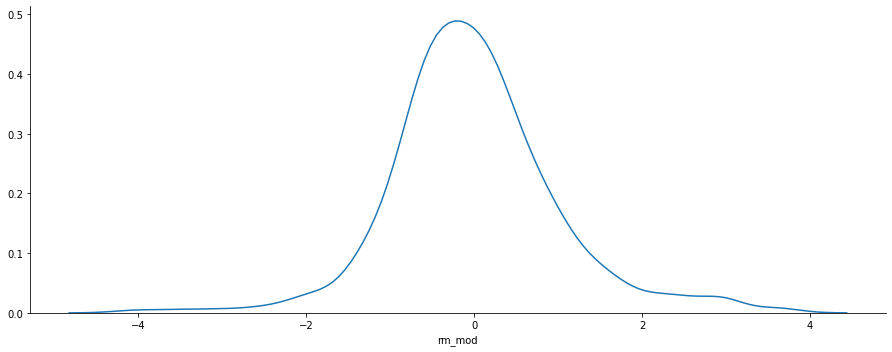

In [12]:
#scaling the feature using standardscaler
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
rm_mod = sd.fit_transform(df["rm"].values.reshape(-1,1))
rm_mod = rm_mod.reshape(rm_mod.shape[0],)
df["rm_mod"] = pd.Series(rm_mod)
#using searborn facetgrid
sns.FacetGrid(df, height=5, aspect=2.5).map(sns.kdeplot, "rm_mod")

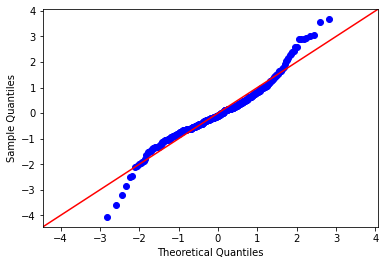

In [13]:
##qq plot
sm.qqplot(df["rm_mod"], line ='45') 
pt.show() 

    Here we can clearly see that feature is not normally distributed. But it somewhat resembles it. We can here draw a 
    conclusion that standardizing (StandardScaler) this feature before feeding it to a model can generate a good result.